In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('pima-indians-diabetes-2.csv')

In [3]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(768, 9)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
X = df.drop('class',axis=1)
y = df['class']

In [16]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [17]:
df['class'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: class, dtype: float64

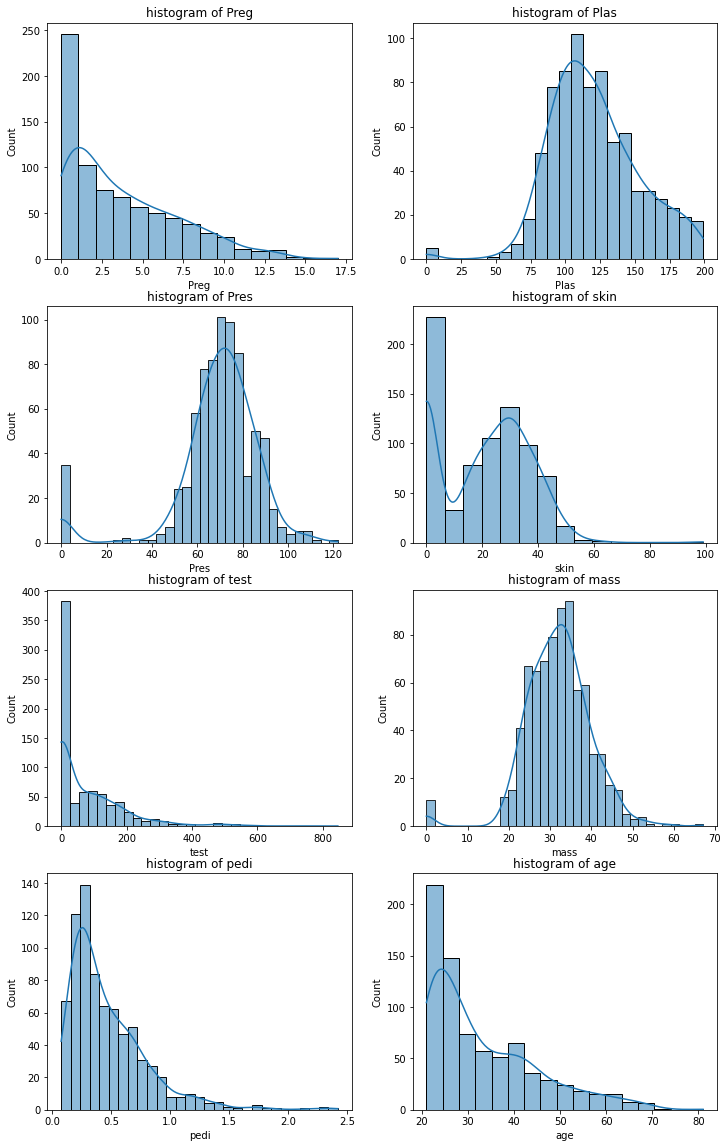

In [25]:
plt.figure(figsize=(12,20))
num_list = X.columns
for i in range(len(X.columns)):
    plt.subplot(4,2,i+1)
    sns.histplot(data=df,x=df[num_list[i]],kde=True)
    plt.title(f'histogram of {num_list[i]}')
    plt.tight_layout

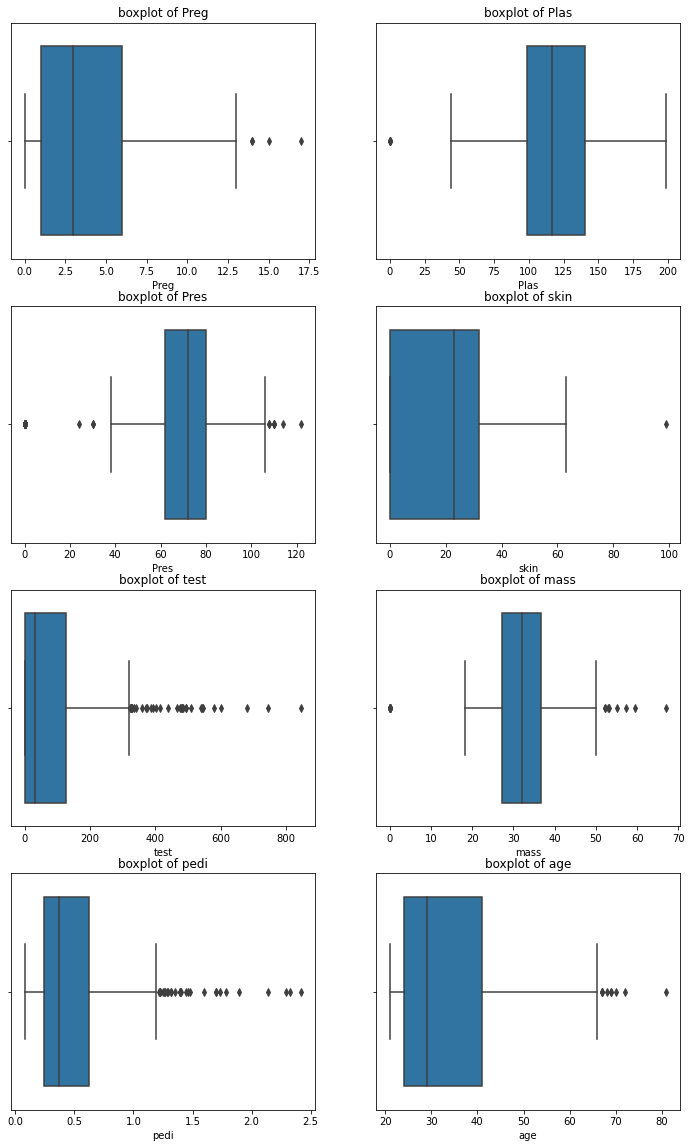

In [26]:
plt.figure(figsize=(12,20))
num_list = X.columns
for i in range(len(X.columns)):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df,x=df[num_list[i]])
    plt.title(f'boxplot of {num_list[i]}')
    plt.tight_layout

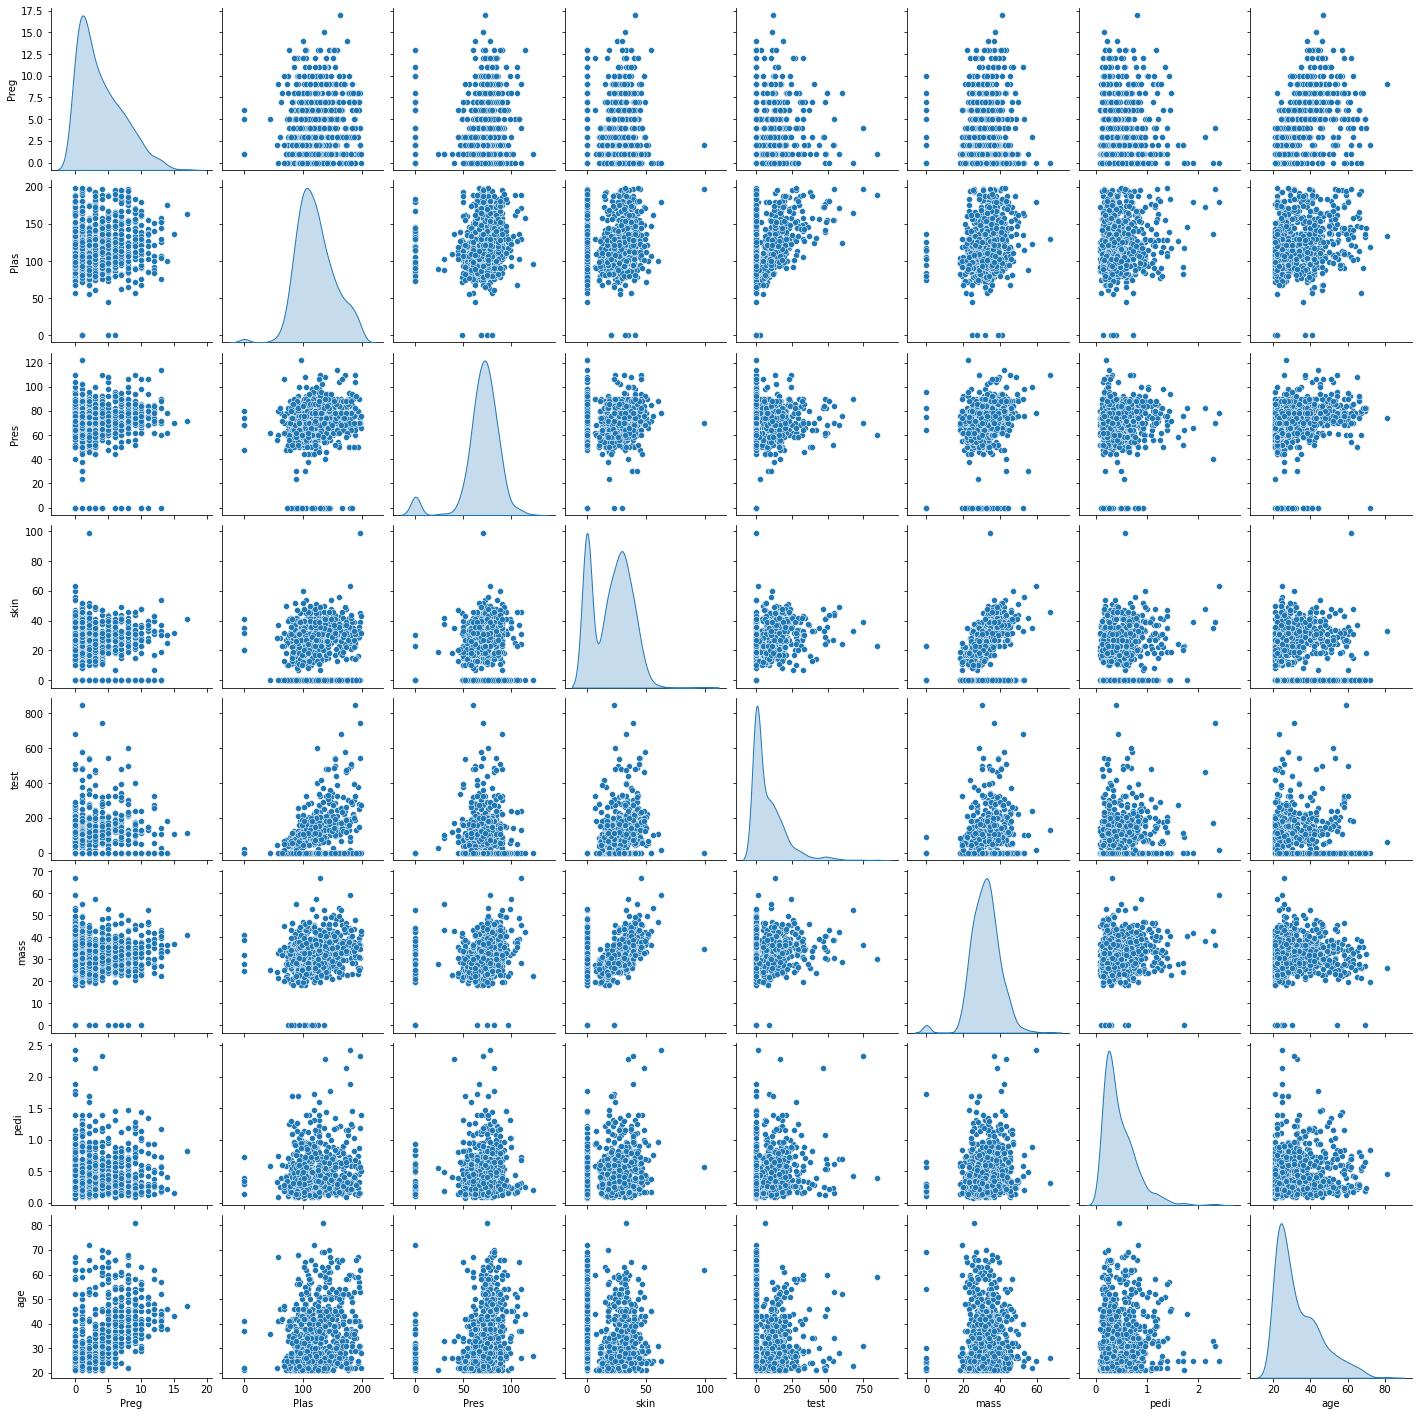

In [28]:
sns.pairplot(X,diag_kind='kde');

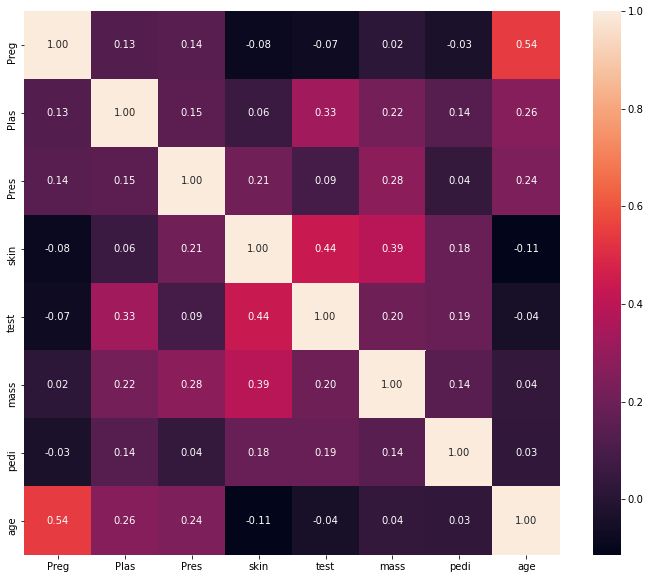

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(),annot=True,fmt='0.2f');

In [32]:
imputer = SimpleImputer(missing_values=0,strategy='mean')

In [36]:
X = imputer.fit_transform(X)

In [38]:
X = pd.DataFrame(data=X,columns=num_list)

In [39]:
X.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1,stratify=y)

In [41]:
y_train.value_counts(normalize=True)

0    0.651769
1    0.348231
Name: class, dtype: float64

In [42]:
y_test.value_counts(normalize=True)

0    0.649351
1    0.350649
Name: class, dtype: float64

In [43]:
classifier = GaussianNB()

In [44]:
classifier.fit(X_train,y_train)

GaussianNB()

In [45]:
pred_train = classifier.predict(X_train)
pred_test = classifier.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve

In [48]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       350
           1       0.68      0.62      0.65       187

    accuracy                           0.77       537
   macro avg       0.74      0.73      0.74       537
weighted avg       0.76      0.77      0.76       537



In [49]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       150
           1       0.59      0.54      0.57        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



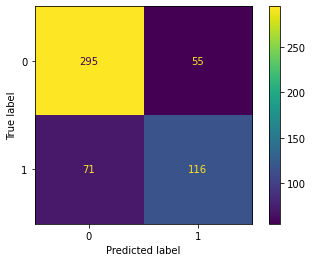

In [53]:
plot_confusion_matrix(estimator=classifier,X=X_train,y_true=y_train);

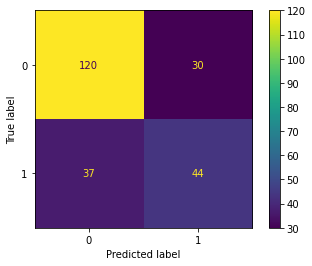

In [54]:
plot_confusion_matrix(estimator=classifier,X=X_test,y_true=y_test);

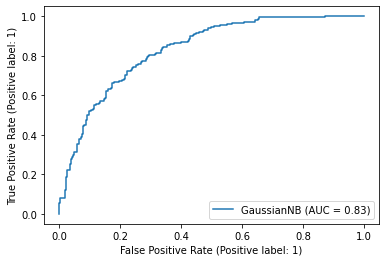

In [56]:
plot_roc_curve(estimator=classifier,X=X_train,y=y_train);

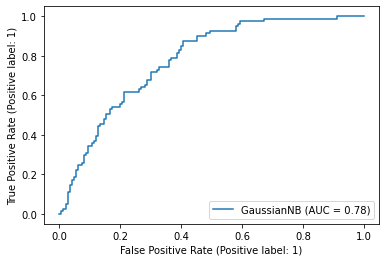

In [57]:
plot_roc_curve(estimator=classifier,X=X_test,y=y_test);